<a href="https://colab.research.google.com/github/laythamra28/DeepLearning-Project/blob/main/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import numpy as np
import torch
import torch.nn as nn

In [ ]:
%cd drive/Shareddrives/'BE 500'

[Errno 2] No such file or directory: 'drive/Shareddrives/BE 500'
/content/drive/Shareddrives/BE 500


In [ ]:
#load in training variables and testing variables
X_train=np.load('X_train.npy')
y_train=np.load('y_train.npy')
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

X_test=np.load('X_test.npy')
y_test=np.load('y_test.npy')
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
#Combine X_test and X_val
X_test_val=np.concatenate((X_val,X_test))
#Combine y_test and y_val
y_test_val=np.concatenate((y_val,y_test))
#y_test_val=torch.from_numpy(y_test_val)

In [ ]:
#Reshape X test
Xtest=torch.from_numpy(X_test)
Xtest=Xtest.reshape((100,1,480,640))

Xtestval=torch.from_numpy(X_test_val)
Xtestval=Xtestval.reshape((250,1,480,640))

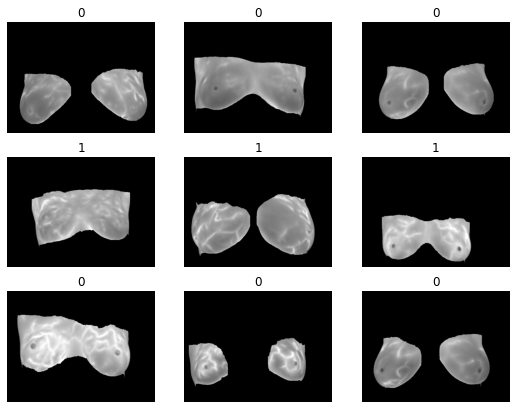

In [ ]:
#Print out the first 9 images in training set and their labels
fig, ax = plt.subplots(3, 3,figsize=(9,7))
for i in range(9):
  im=X_train[i,:,:]
  ax[i//3,i%3].imshow(im,cmap='gray')
  ax[i//3, i%3].set_title(int(y_train[i][0]))
  ax[i//3,i%3].axis('off')

# VGG Net Architecture

Documentation: https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918

In [ ]:
class VGG(nn.Module): 
    
    def __init__(self): 
        super().__init__()
        
        # convolution: 3x3 filter, stride 1, same padding
        # max pool: 2x2, stride 2 
        
        # layer 1: two conv. 16 filters each & 1 maxpool
        self.conv1_1 = nn.Conv2d(1, 16, 3, 1, padding = 'same')
        self.conv1_2 = nn.Conv2d(16, 16, 3, 1, padding = 'same')
        self.maxpool_1 = nn.MaxPool2d(2, stride = 2)
        self.conv1_bn = nn.BatchNorm2d(16)
        
        # layer 2: two conv. 128 filters each & 1 maxpool
        self.conv2_1 = nn.Conv2d(16, 32, 3, 1, padding = 'same')
        self.conv2_2 = nn.Conv2d(32, 32, 3, 1, padding = 'same')
        self.maxpool_2 = nn.MaxPool2d(2, stride = 2)
        self.conv2_bn = nn.BatchNorm2d(32)

        
        # layer 3:  3 conv. 256 filters each & 1 maxpool
        self.conv3_1 = nn.Conv2d(32, 64, 3, 1, padding = 'same')
        self.conv3_2 = nn.Conv2d(64, 64, 3, 1, padding = 'same')
        self.conv3_3 = nn.Conv2d(64, 64, 3, 1, padding = 'same')
        self.maxpool_3 = nn.MaxPool2d(2, stride = 2)
        self.conv3_bn = nn.BatchNorm2d(64)

        
        # layer 4: 3 con. 512 filters each & 1 maxpool
        self.conv4_1 = nn.Conv2d(64, 128, 3, 1, padding = 'same')
        self.conv4_2 = nn.Conv2d(128, 128, 3, 1, padding = 'same')
        self.conv4_3 = nn.Conv2d(128, 128, 3, 1, padding = 'same')
        self.maxpool_4 = nn.MaxPool2d(2, stride = 2)
        self.conv4_bn = nn.BatchNorm2d(128)
        
        # layer 5: 3 con. 512 filters each & 1 maxpool
        self.conv5_1 = nn.Conv2d(128, 256, 3, 1, padding = 'same')
        self.conv5_2 = nn.Conv2d(256, 256, 3, 1, padding = 'same')
        self.conv5_3 = nn.Conv2d(256, 256, 3, 1, padding = 'same')
        self.maxpool_5 = nn.MaxPool2d(2, stride = 2)
        self.conv5_bn = nn.BatchNorm2d(256)
        
        # flatten for FC layers
        self.flatten = nn.Flatten()
        
        # layer 6: linear
        self.linear_1 = nn.Linear(15*20*256, 4096)
        self.relu_1 = nn.ReLU()
        self.fc1_bn=nn.BatchNorm1d(4096)
        
        # layer 7: linear
        self.linear_2 = nn.Linear(4096, 4096)
        self.relu_2 = nn.ReLU()
        self.fc2_bn=nn.BatchNorm1d(4096)

        # layer 8: linear
        self.linear_3 = nn.Linear(4096, 1)
        self.sigmoid = nn.Sigmoid()
        
    # define forward prop using network created
    def forward(self, x):
        
        # convolution & maxpool 1
        out = self.conv1_1(x)
        out = self.maxpool_1(out)
        out = self.conv1_bn(out)
        
        # convolution & maxpool 2
        out = self.conv2_1(out)
        out = self.maxpool_2(out)
        out = self.conv2_bn(out)

        # convolution & maxpool 3
        out = self.conv3_1(out)
        out = self.maxpool_3(out)
        out = self.conv3_bn(out)
        
        # convolution & maxpool 4
        out = self.conv4_1(out)
        out = self.maxpool_4(out)
        out = self.conv4_bn(out)
        
        # convolution & maxpool 5
        out = self.conv5_1(out)
        out = self.maxpool_5(out)
        out = self.conv5_bn(out)
        
        # flatten for FC layers
        out = self.flatten(out)
        
        # FC linear layers
        out = self.linear_1(out)
        out = self.relu_1(out)
        out = self.fc1_bn(out)
        out = self.linear_2(out)
        out = self.relu_2(out)
        out = self.fc2_bn(out)
        out = self.linear_3(out)
        out = self.sigmoid(out)
        
        return out

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
Xtest=Xtest.to(device)
Xtestval = Xtestval.to(device)

Xtrain=torch.from_numpy(X_train)
Xtrain=Xtrain.reshape((750,1,480,640))



torch.manual_seed(0)
m=VGG()
m=m.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(m.parameters(), lr = .000001)

ytrain=torch.from_numpy(y_train)
ytrain=ytrain.to(device)

from torch.utils.data import DataLoader,TensorDataset, random_split

dataset = TensorDataset(Xtrain, ytrain)
trainloader=DataLoader(dataset=dataset,batch_size=64)

In [ ]:
lossy=np.zeros(100)

import time
start_time=time.time() # record training time

for epoch in range(100):
  for x,y in trainloader:
    x=x.to(device)
    y=y.to(device)
    pred_y = m(x)
 
    # Compute and print loss
    loss = criterion(pred_y, y)
    lossy[epoch]=loss
 
    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    del x
    del y
    torch.cuda.empty_cache()

    
  print('epoch {}: loss = {}'.format(epoch,loss.item()))

print(f'Training Time = {time.time()-start_time}')

epoch 0: loss = 0.30301597714424133
epoch 1: loss = 0.06950458884239197
epoch 2: loss = 0.03605714812874794
epoch 3: loss = 0.023035142570734024
epoch 4: loss = 0.017379501834511757
epoch 5: loss = 0.014119395986199379
epoch 6: loss = 0.01183495856821537
epoch 7: loss = 0.010131463408470154
epoch 8: loss = 0.008820222690701485
epoch 9: loss = 0.007779465988278389
epoch 10: loss = 0.00693153589963913
epoch 11: loss = 0.006224118173122406
epoch 12: loss = 0.005628260783851147
epoch 13: loss = 0.005120466463267803
epoch 14: loss = 0.004684532061219215
epoch 15: loss = 0.004307226277887821
epoch 16: loss = 0.003976001869887114
epoch 17: loss = 0.0036841670516878366
epoch 18: loss = 0.003426638664677739
epoch 19: loss = 0.0031981999054551125
epoch 20: loss = 0.0029935953207314014
epoch 21: loss = 0.0028092453721910715
epoch 22: loss = 0.0026426073163747787
epoch 23: loss = 0.002491671359166503
epoch 24: loss = 0.002354077761992812
epoch 25: loss = 0.0022286158055067062
epoch 26: loss = 0.00

In [ ]:
VGG = lossy 
%cd drive/Shareddrives/'BE 500'
np.save('VGG_loss',VGG)


[Errno 2] No such file or directory: 'drive/Shareddrives/BE 500'
/content/drive/Shareddrives/BE 500/Dataset


<All keys matched successfully>

In [ ]:
# define plot style (make it pretty :))
import seaborn as sns
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

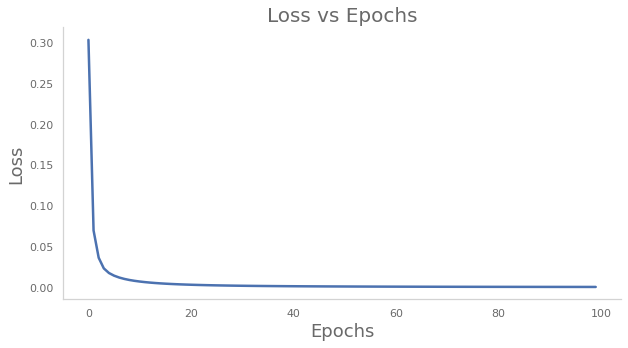

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=lossy,palette='deep',linewidth=2.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [ ]:
m=m.to(device)
torch.save(m.state_dict(), 'VGG_model')

In [ ]:
Vgg_loaded=VGG()
Vgg_loaded.load_state_dict(torch.load('VGG_model'))

<All keys matched successfully>

## Testing on Test+Val set

In [ ]:
Vgg_loaded.to(device)
with torch.no_grad():
    z = Vgg_loaded(Xtestval.to(device))

y_pred=z.round()

ypred=y_pred.cpu().detach().numpy()

In [ ]:
acc=sum(ypred==y_test_val)/len(y_test_val)
acc=acc[0]
print(f'Accuracy={acc*100}')

Accuracy=94.39999999999999


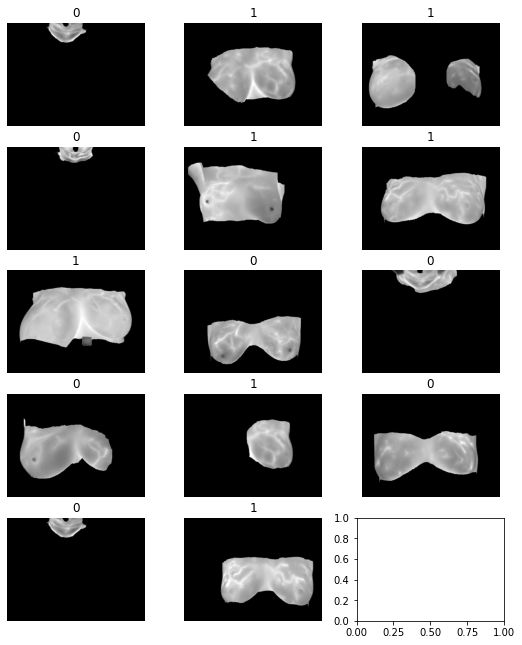

In [ ]:
fig, ax = plt.subplots(5,3,figsize=(9,11))
count = 0
for i in range(len(y_test_val)):
  if count < 15: 
    if ypred[i]!=y_test_val[i]:
      im = X_test_val[i,:,:]
      ax[count//3,count%3].imshow(im,cmap='gray')
      ax[count//3,count%3].set_title(int(y_test_val[i][0]))
      ax[count//3,count%3].axis('off')
      count+=1

## Testing on Test set

In [ ]:
with torch.no_grad():
    z = m(Xtest.to(device))

y_pred=z.round()

ypred=y_pred.cpu().detach().numpy()

In [ ]:
acc=sum(ypred==y_test)/len(y_test)
acc=acc[0]
print(f'Accuracy={acc*100}')

Accuracy=93.0


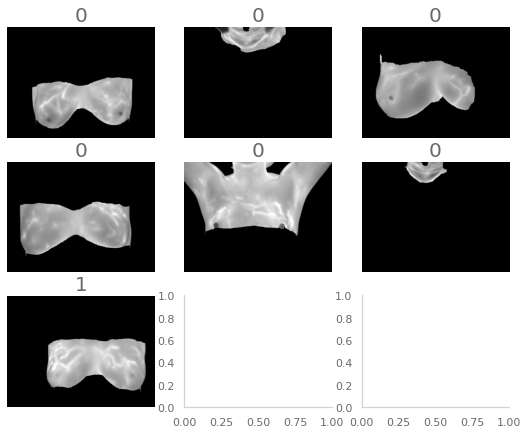

In [ ]:
fig, ax = plt.subplots(3, 3,figsize=(9,7))
count = 0
for i in range(len(y_test)):
  if count < 9: 
    if ypred[i]!=y_test[i]:
      im = X_test[i,:,:]
      ax[count//3,count%3].imshow(im,cmap='gray')
      ax[count//3,count%3].set_title(int(y_test[i][0]))
      ax[count//3,count%3].axis('off')
      count+=1

In [ ]:
%cd BE500

/content/drive/Shareddrives


In [ ]:
!jupyter nbconvert --to html "VGG.ipynb"

[NbConvertApp] WARNING | pattern 'VGG.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute